# Cat or Dog Convolutional Neural Network

In this notebook we will use a dataset composed of 10000 images of cats and dogs. 
In particular:
- Training set : 4000 images of dogs and 4000 images of cats
- Test set : 1000 images of dogs and 1000 images of cats

In this case we won't have a real Data Preprocessing part, since all the preprocessing including the collection of the image, and their division in train and test set have already been done manually.
The model has been trained using an NVIDIA GeForce GTX 1050 gpu.

## Part 1 - Building the CNN

In [2]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

C:\Users\Marco\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0']

In [3]:
import tensorflow as tf
sess = tf.Session()

In [35]:
# Import libraries
from PIL import Image
import h5py
import numpy as np
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import Dropout
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.callbacks import Callback
import os

In [38]:
# Initialing the CNN
classifier = Sequential()

In [39]:
# Step 1 - Convolution
classifier.add(Convolution2D(filters = 32, kernel_size = (3, 3), input_shape = (128, 128, 3), activation = 'relu'))

In [40]:
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [41]:
# Add a second Convolutional Layer
classifier.add(Convolution2D(filters = 32, kernel_size = (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [42]:
# Add a third Convolutional Layer
classifier.add(Convolution2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [43]:
# Step 3 - Flattening
classifier.add(Flatten())

In [44]:
# Step 4 - Full Connection
classifier.add(Dense(64, activation = 'relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(1, activation = 'sigmoid'))

In [45]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Part 2 - Fitting the CNN to the images

We will use image augmentation to avoid overfitting. Since the NN needs lot of images, we will use this technique to augment the number of training images.
We rescale the image so that the values of the pixels are between 0 and 1.

In [46]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                        target_size=(128, 128),
                                                        batch_size=32,
                                                        class_mode='binary')

test_set = test_datagen.flow_from_directory('dataset/test_set',
                                                        target_size=(128, 128),
                                                        batch_size=32,
                                                        class_mode='binary')

# Create a loss history
history = LossHistory()

filepath="weights4.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

classifier.fit_generator(training_set,
                    steps_per_epoch=(8000/32),
                    epochs=90,
                    validation_data=test_set,
                    validation_steps=(2000/32),
                    callbacks=callbacks_list)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/90
250/250 [==============================] - 53s 213ms/step - loss: 0.6723 - acc: 0.5707 - val_loss: 0.6356 - val_acc: 0.6220

Epoch 00001: val_acc improved from -inf to 0.62200, saving model to weights4.best.hdf5
Epoch 2/90
250/250 [==============================] - 48s 190ms/step - loss: 0.6243 - acc: 0.6539 - val_loss: 0.5675 - val_acc: 0.7250

Epoch 00002: val_acc improved from 0.62200 to 0.72500, saving model to weights4.best.hdf5
Epoch 3/90
250/250 [==============================] - 55s 221ms/step - loss: 0.5777 - acc: 0.6970 - val_loss: 0.5411 - val_acc: 0.7220

Epoch 00003: val_acc did not improve
Epoch 4/90
250/250 [==============================] - 53s 212ms/step - loss: 0.5335 - acc: 0.7304 - val_loss: 0.5101 - val_acc: 0.7530

Epoch 00004: val_acc improved from 0.72500 to 0.75300, saving model to weights4.best.hdf5
Epoch 5/90
250/250 [==============================] - 51s 205ms/step

250/250 [==============================] - 56s 225ms/step - loss: 0.1988 - acc: 0.9199 - val_loss: 0.4402 - val_acc: 0.8560

Epoch 00042: val_acc did not improve
Epoch 43/90
250/250 [==============================] - 55s 221ms/step - loss: 0.2013 - acc: 0.9113 - val_loss: 0.3947 - val_acc: 0.8670

Epoch 00043: val_acc did not improve
Epoch 44/90
250/250 [==============================] - 47s 187ms/step - loss: 0.2082 - acc: 0.9113 - val_loss: 0.3576 - val_acc: 0.8700

Epoch 00044: val_acc did not improve
Epoch 45/90
250/250 [==============================] - 55s 221ms/step - loss: 0.1872 - acc: 0.9206 - val_loss: 0.3905 - val_acc: 0.8795

Epoch 00045: val_acc improved from 0.87550 to 0.87950, saving model to weights4.best.hdf5
Epoch 46/90
250/250 [==============================] - 51s 203ms/step - loss: 0.1963 - acc: 0.9178 - val_loss: 0.3743 - val_acc: 0.8720

Epoch 00046: val_acc did not improve
Epoch 47/90
250/250 [==============================] - 55s 220ms/step - loss: 0.1882 - ac

250/250 [==============================] - 53s 212ms/step - loss: 0.1276 - acc: 0.9483 - val_loss: 0.4769 - val_acc: 0.8680

Epoch 00088: val_acc did not improve
Epoch 89/90
250/250 [==============================] - 48s 192ms/step - loss: 0.1191 - acc: 0.9527 - val_loss: 0.4811 - val_acc: 0.8810

Epoch 00089: val_acc did not improve
Epoch 90/90
250/250 [==============================] - 53s 214ms/step - loss: 0.1286 - acc: 0.9530 - val_loss: 0.4611 - val_acc: 0.8845

Epoch 00090: val_acc improved from 0.88400 to 0.88450, saving model to weights4.best.hdf5


In [48]:
classifier = load_model(filepath)

Now we will try to make a single prediction, using a picture of my dog to see if our model will be able to recognize it or not 

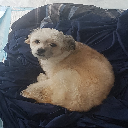

In [53]:
# Load image
single_test = image.load_img('dataset/mydog/mydog.jpg', target_size = (128, 128))
single_test

Now we need to add a third dimension to our image, so that we will obtain a 3 dimensional array that has the shape required by the neural network

In [54]:
# Transform into an 3 dimensional array
image_array = image.img_to_array(single_test)

In [55]:
# Add a 4th dimension that corresponds to the batch
image_array = np.expand_dims(image_array, axis = 0)

In [56]:
# Single prediction
pred = classifier.predict(image_array)
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [57]:
if pred[0][0] == 1:
    prediction = 'dog'
else:
    prediciton = 'cat'

In [58]:
print('The predicted label for the image is: ' + prediction)

The predicted label for the image is: dog
